### ISSS621 Data Science for Business

## 1.0 Import Libraries & Load Dataset
--------------------------
Source: https://www.sciencedirect.com/science/article/pii/S2352340918315191

In [1]:
import matplotlib

print(matplotlib.__version__)


3.7.1


In [2]:
import numpy as np 
import pandas as pd 
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

pd.set_option('display.max_columns',None) # Display all columns
pd.set_option('display.float_format', lambda x: '%.1f' % x) # Standardise decimal places in tables

In [3]:
import io

# load data
df = pd.read_csv('hotel_bookings.csv')

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,nan,nan,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,nan,nan,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,nan,nan,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,nan,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,nan,0,Transient,98.0,0,1,Check-Out,2015-07-03


## 2.0 Data Pre-Processing & Cleaning
----------------------------

In [5]:
df.shape

(119390, 32)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [8]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.0,119390.0,119390.0,119390.0,119390.0,119390.0,119390.0,119390.0,119386.0,119390.0,119390.0,119390.0,119390.0,119390.0,103050.0,6797.0,119390.0,119390.0,119390.0,119390.0
mean,0.4,104.0,2016.2,27.2,15.8,0.9,2.5,1.9,0.1,0.0,0.0,0.1,0.1,0.2,86.7,189.3,2.3,101.8,0.1,0.6
std,0.5,106.9,0.7,13.6,8.8,1.0,1.9,0.6,0.4,0.1,0.2,0.8,1.5,0.7,110.8,131.7,17.6,50.5,0.2,0.8
min,0.0,0.0,2015.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,-6.4,0.0,0.0
25%,0.0,18.0,2016.0,16.0,8.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,62.0,0.0,69.3,0.0,0.0
50%,0.0,69.0,2016.0,28.0,16.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,179.0,0.0,94.6,0.0,0.0
75%,1.0,160.0,2017.0,38.0,23.0,2.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,229.0,270.0,0.0,126.0,0.0,1.0
max,1.0,737.0,2017.0,53.0,31.0,19.0,50.0,55.0,10.0,10.0,1.0,26.0,72.0,21.0,535.0,543.0,391.0,5400.0,8.0,5.0


In [9]:
# check for duplicates
df.duplicated().sum

<bound method Series.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 119390, dtype: bool>

In [10]:
# check total number of duplicated rows
len(df[df.duplicated()])

31994

We do not remove these duplicates as they could represent genuine bookings (bulk/group)

In [11]:
# check missing values
round(df.isnull().sum()/df.shape[0]*100,2)

hotel                             0.0
is_canceled                       0.0
lead_time                         0.0
arrival_date_year                 0.0
arrival_date_month                0.0
arrival_date_week_number          0.0
arrival_date_day_of_month         0.0
stays_in_weekend_nights           0.0
stays_in_week_nights              0.0
adults                            0.0
children                          0.0
babies                            0.0
meal                              0.0
country                           0.4
market_segment                    0.0
distribution_channel              0.0
is_repeated_guest                 0.0
previous_cancellations            0.0
previous_bookings_not_canceled    0.0
reserved_room_type                0.0
assigned_room_type                0.0
booking_changes                   0.0
deposit_type                      0.0
agent                            13.7
company                          94.3
days_in_waiting_list              0.0
customer_typ

"company" column indicates if a company made the booking or is responsible for paying the booking

94% of "company" column contains missing values, which indicates 94% of records are company bookings. We will recode the column to is_CompanyBooked with values 0 and 1, 1 indicating company booking and 0 otherwise.

In [12]:
df['is_CompanyBooked'] = df['company'].apply(lambda x: 1 if pd.notnull(x) else 0)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_CompanyBooked
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,nan,nan,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,nan,nan,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,nan,nan,0,Transient,75.0,0,0,Check-Out,2015-07-02,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,nan,0,Transient,75.0,0,0,Check-Out,2015-07-02,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,nan,0,Transient,98.0,0,1,Check-Out,2015-07-03,0


In [13]:
# check data types
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [14]:
# Create an additional merged arrival date column
df["arrival_date_year"] = df["arrival_date_year"].astype(str)
df["arrival_date_day_of_month"] = df["arrival_date_day_of_month"].astype(str)
df["arrival_date_merged"] = df["arrival_date_year"] + "-" + df["arrival_date_month"] + "-" + df["arrival_date_day_of_month"]
df["arrival_date_merged"]

0            2015-July-1
1            2015-July-1
2            2015-July-1
3            2015-July-1
4            2015-July-1
               ...      
119385    2017-August-30
119386    2017-August-31
119387    2017-August-31
119388    2017-August-31
119389    2017-August-29
Name: arrival_date_merged, Length: 119390, dtype: object

In [15]:
pd.to_datetime(df["arrival_date_merged"])

0        2015-07-01
1        2015-07-01
2        2015-07-01
3        2015-07-01
4        2015-07-01
            ...    
119385   2017-08-30
119386   2017-08-31
119387   2017-08-31
119388   2017-08-31
119389   2017-08-29
Name: arrival_date_merged, Length: 119390, dtype: datetime64[ns]

In [16]:
# Convert 'children' and 'agent' to int64 data type
df['children'] = df['children'].replace('NA', 0)
df['children'] = df['children'].fillna(0)
df['children'] = df['children'].astype('int64')
df['agent'] = df['agent'].fillna(0)
df['agent'] = df['agent'].astype('int64')

# Convert 'company' to object data type
df['company'] = df['company'].astype('object')

# Convert 'reservation_status_date' to datetime data type
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%Y-%m-%d')

In [17]:
df["arrival_date_merged"] = pd.to_datetime(df["arrival_date_merged"])

In [18]:
df["arrival_date_merged"]

0        2015-07-01
1        2015-07-01
2        2015-07-01
3        2015-07-01
4        2015-07-01
            ...    
119385   2017-08-30
119386   2017-08-31
119387   2017-08-31
119388   2017-08-31
119389   2017-08-29
Name: arrival_date_merged, Length: 119390, dtype: datetime64[ns]

In [19]:
# Create an additional total_nights_stayed column
df['total_nights_stayed'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

In [20]:
# Split to city hotel and resort hotel
df_city = df[df['hotel'] == 'City Hotel']
df_resort = df[df['hotel'] == 'Resort Hotel']

In [21]:
(df_city.shape, df_resort.shape)

((79330, 35), (40060, 35))

For our analysis, we will only focus on City Hotel.

#### Finding Maximum Capacity of City Hotel

In [22]:
# remove cancelled booking records
df_city_max = df_city[df_city["is_canceled"] == 0]
df_city_max.shape

(46228, 35)

In [23]:
# retain relevant cols
df_city_max = df_city_max.loc[:,['arrival_date_merged','reservation_status','reservation_status_date', 'total_nights_stayed']]
df_city_max.head()

,arrival_date_merged,reservation_status,reservation_status_date,total_nights_stayed
40060,2015-07-01,Check-Out,2015-07-03,2
40066,2015-07-02,Check-Out,2015-07-05,3
40070,2015-07-03,Check-Out,2015-07-05,2
40071,2015-07-03,Check-Out,2015-07-05,2
40072,2015-07-03,Check-Out,2015-07-05,2


In [24]:
# % of transactions with 0 total nights stayed
round(df_city_max[df_city_max['total_nights_stayed']==0].shape[0] / df_city_max.shape[0] * 100,2)

0.67

In [25]:
# remove these transactions since we are unable to verify if these bookings fall on the same timeslot or different timeslot within the same day
df_city_max = df_city_max[df_city_max['total_nights_stayed'] != 0]
df_city_max.shape

(45920, 4)

In [26]:
# There is only one reservation_status (Check_Out), hence reservation_status_date can be used as check-out date
df_city_max['reservation_status'].nunique()

1

In [27]:
# Check total number of dates
df_city_max['arrival_date_merged'].nunique()

787

In [28]:
# Store the date range in a list
city_date_list = pd.date_range(df_city_max['arrival_date_merged'].iloc[0],df_city_max['reservation_status_date'].iloc[-1])
city_date_list

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
               '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08',
               '2015-07-09', '2015-07-10',
               ...
               '2017-08-29', '2017-08-30', '2017-08-31', '2017-09-01',
               '2017-09-02', '2017-09-03', '2017-09-04', '2017-09-05',
               '2017-09-06', '2017-09-07'],
              dtype='datetime64[ns]', length=800, freq='D')

In [29]:
# Create an array to store date of stay frequency
city_arr=np.zeros(len(city_date_list))
len(city_arr)

800

In [30]:
# Iterate through the dataframe to count date of stay frequency
for index, row in df_city_max.iterrows():
    start_day = city_date_list.get_loc(row['arrival_date_merged'])
    end_day = city_date_list.get_loc(row['reservation_status_date'])
    city_arr[start_day:end_day+1] += 1

In [31]:
# Assume the maximum occupancy is full house
max_city_value = city_arr.max()
city_full_house_index = [i for i, v in enumerate(list(city_arr)) if v == city_arr.max()]
city_full_house_date = [list(city_date_list)[city_full_house_index[i]] for i in range(len(city_full_house_index))]
print(f"City hotel - Max occupancy: {max_city_value}, Corresponding date: {city_full_house_date}")

City hotel - Max occupancy: 350.0, Corresponding date: [Timestamp('2016-06-26 00:00:00', freq='D')]


## 3.0 Exploratory Data Analysis (EDA)
--------------------------------------

In [32]:
df_city.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_CompanyBooked,arrival_date_merged,total_nights_stayed
40060,City Hotel,0,6,2015,July,27,1,0,2,1,0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-03,0,2015-07-01,2
40061,City Hotel,1,88,2015,July,27,1,0,4,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NaN,0,Transient,76.5,0,1,Canceled,2015-07-01,0,2015-07-01,4
40062,City Hotel,1,65,2015,July,27,1,0,4,1,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NaN,0,Transient,68.0,0,1,Canceled,2015-04-30,0,2015-07-01,4
40063,City Hotel,1,92,2015,July,27,1,2,4,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NaN,0,Transient,76.5,0,2,Canceled,2015-06-23,0,2015-07-01,6
40064,City Hotel,1,100,2015,July,27,2,0,2,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NaN,0,Transient,76.5,0,1,Canceled,2015-04-02,0,2015-07-02,2


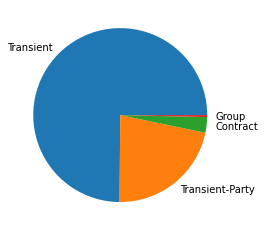

In [33]:
# Customer_type
df_city['customer_type'].value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

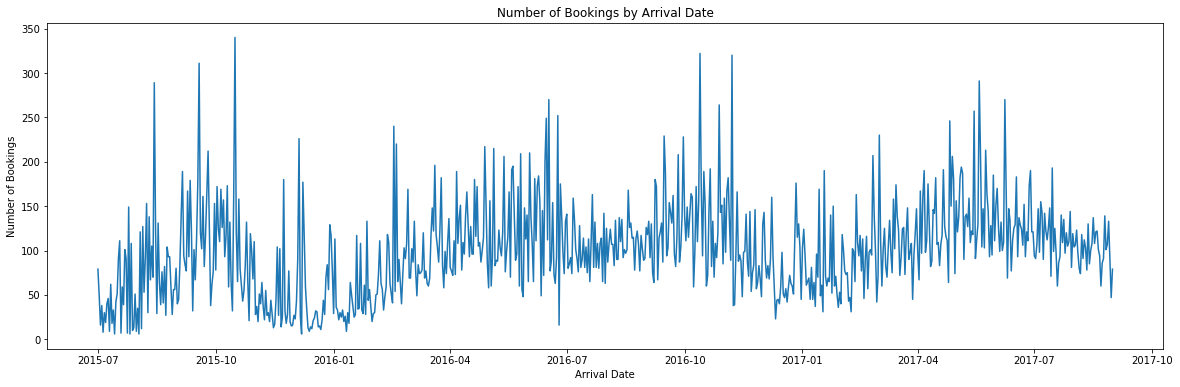

In [34]:
plt.figure(figsize=(20, 6))

# Group the data by arrival_date_merged and count the number of records for each date
records_by_date = df_city.groupby('arrival_date_merged').size()

# Create a line plot of the number of records by arrival date
plt.plot(records_by_date.index, records_by_date.values)

# Set the axis labels and title
plt.xlabel('Arrival Date')
plt.ylabel('Number of Bookings')
plt.title('Number of Bookings by Arrival Date')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=0)

# Show the plot
plt.show()

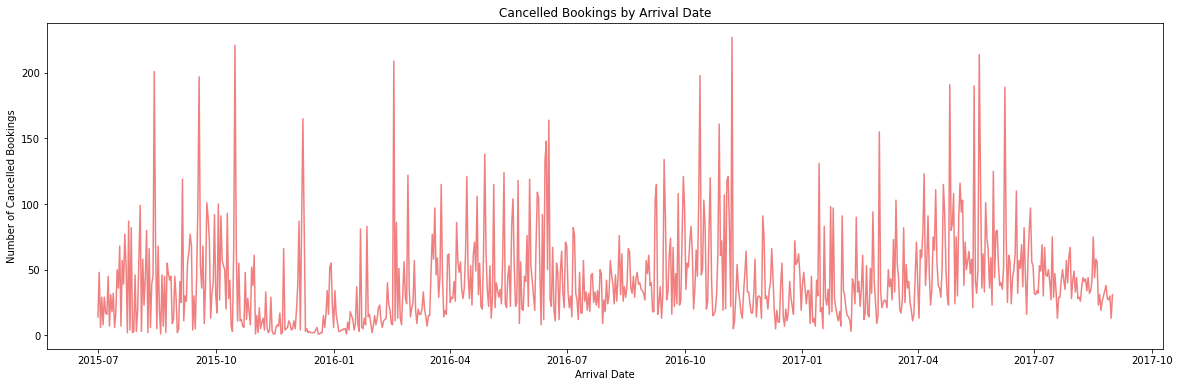

In [35]:
# Cancellation over time
plt.figure(figsize=(20, 6))

# Filter out non-cancelled bookings
df_city_cancelled = df_city[df_city['is_canceled'] == 1]

# Group the cancelled bookings by arrival date and is_canceled
grouped_cancelled = df_city_cancelled.groupby(['arrival_date_merged', 'is_canceled']).size().reset_index(name='count')

# Filter the grouped data to only show cancelled bookings
grouped_cancelled = grouped_cancelled[grouped_cancelled['is_canceled'] == 1]

# Create a line chart of the number of cancelled bookings over time
plt.plot(grouped_cancelled['arrival_date_merged'], grouped_cancelled['count'], color='lightcoral')

# Set the axis labels and title
plt.xlabel('Arrival Date')
plt.ylabel('Number of Cancelled Bookings')
plt.title('Cancelled Bookings by Arrival Date')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=0)

# Show the plot
plt.show()

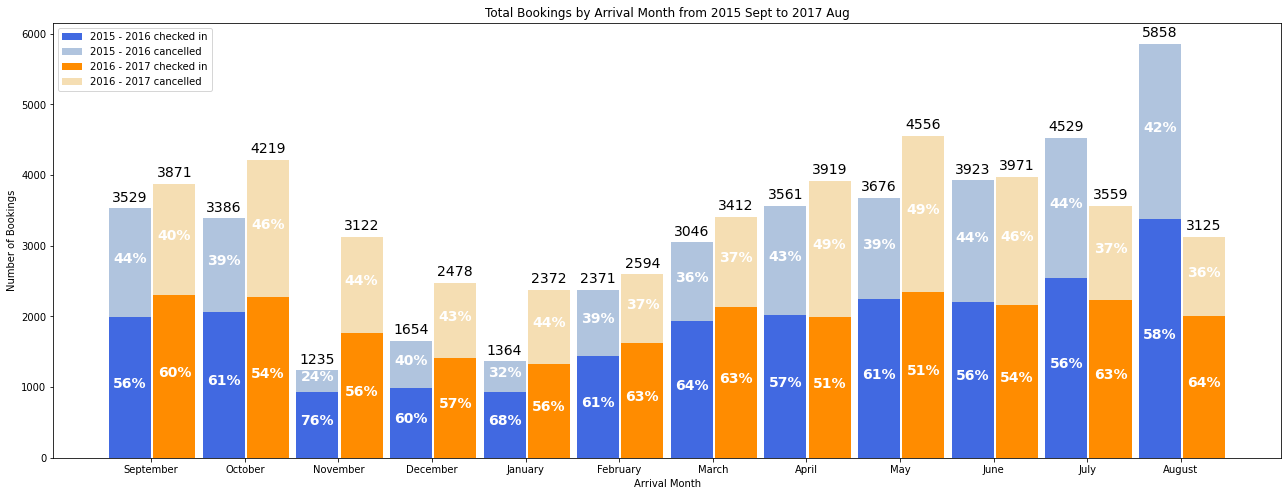

In [36]:

# Total number of bookings over month
fig = plt.figure(figsize=(22, 8))
ax = fig.add_subplot(111)

# Take the latest 2 full year data
df_city_first_year_0 = df_city[(df_city['arrival_date_merged'] < '2016-09-01') & (df_city['is_canceled'] == 0)]
df_city_first_year_1 = df_city[(df_city['arrival_date_merged'] < '2016-09-01') & (df_city['is_canceled'] == 1)]
df_city_second_year_0 = df_city[(df_city['arrival_date_merged'] < '2017-09-01') & (df_city['arrival_date_merged'] >= '2016-09-01')& (df_city['is_canceled'] == 0)]
df_city_second_year_1 = df_city[(df_city['arrival_date_merged'] < '2017-09-01') & (df_city['arrival_date_merged'] >= '2016-09-01')& (df_city['is_canceled'] == 1)]

# Group by month
cats = ['September', 'October', 'November', 'December', 'January', 'February', 'March', 'April', 'May', 'June','July', 'August']


df_city_first_year_0 = df_city_first_year_0.groupby(['arrival_date_month']).size().reindex(cats).reset_index(name = 'count')
df_city_first_year_1 = df_city_first_year_1.groupby(['arrival_date_month']).size().reindex(cats).reset_index(name = 'count')
df_city_second_year_0 = df_city_second_year_0.groupby(['arrival_date_month']).size().reindex(cats).reset_index(name = 'count')
df_city_second_year_1 = df_city_second_year_1.groupby(['arrival_date_month']).size().reindex(cats).reset_index(name = 'count')

# Define the width of the bars
width = 0.45

# Define the x-coordinates for the bars
ind = np.arange(len(cats))

# Create bars
year_1_checked_in = ax.bar(ind, df_city_first_year_0['count'], width, color='royalblue')
year_1_cancelled = ax.bar(ind, df_city_first_year_1['count'], width, bottom =  df_city_first_year_0['count'] , color='lightsteelblue')

year_2_checked_in = ax.bar(ind + width*1.05, df_city_second_year_0['count'], width, color='darkorange')
year_2_cancelled = ax.bar(ind + width*1.05, df_city_second_year_1['count'], width, bottom =  df_city_second_year_0['count'] , color='wheat')

    
# Add bar label

merged_month = pd.merge(df_city_first_year_0,df_city_first_year_1, on = 'arrival_date_month')
merged_month = merged_month.rename(columns = {'count_x':'checked_in_1','count_y':'canceled_1'})
merged_month = pd.merge(merged_month,df_city_second_year_0, on = 'arrival_date_month')
merged_month = pd.merge(merged_month,df_city_second_year_1, on = 'arrival_date_month')
merged_month = merged_month.rename(columns = {'count_x':'checked_in_2','count_y':'canceled_2'})

merged_month['sum_1'] = merged_month['checked_in_1'] + merged_month['canceled_1']
merged_month['sum_2'] = merged_month['checked_in_2'] + merged_month['canceled_2']
merged_month['checked_in_1_%'] = (merged_month['checked_in_1'] / merged_month['sum_1'])*100
merged_month['canceled_1_%'] = (merged_month['canceled_1'] / merged_month['sum_1'])*100
merged_month['checked_in_2_%'] = (merged_month['checked_in_2'] / merged_month['sum_2'])*100
merged_month['canceled_2_%'] = (merged_month['canceled_2'] / merged_month['sum_2'])*100


sum_size = 14
block_size = 14

sum_color = 'black'
block_color = 'white'

for i in range(len(cats)):
    # Overall bar label 1
    ax.text(i, merged_month['sum_1'].loc[i] + 100, 
            merged_month['sum_1'].loc[i], 
            ha='center', 
            color = sum_color,
            size = sum_size)
    # Overall bar label 2
    ax.text(i + width*1.05, merged_month['sum_2'].loc[i] + 100, 
            merged_month['sum_2'].loc[i], 
            ha='center', 
            color = sum_color,
            size = sum_size)
    # Not canceled 1
    ax.text(i, merged_month['checked_in_1'].loc[i] / 2, 
            f'{merged_month["checked_in_1_%"].loc[i]:.0f}%', 
            ha='center', 
            color = block_color,
            size = block_size,
            weight = 'bold')
    # Canceled 1
    ax.text(i, merged_month['checked_in_1'].loc[i] + merged_month['canceled_1'].loc[i] / 2, 
            f'{merged_month["canceled_1_%"].loc[i]:.0f}%', 
            ha='center', 
            color = block_color,
            size = block_size,
            weight = 'bold')
    # Not canceled 2
    ax.text(i + width*1.05, merged_month['checked_in_2'].loc[i] / 2, 
            f'{merged_month["checked_in_2_%"].loc[i]:.0f}%', 
            ha='center', 
            color = block_color,
            size = block_size,
            weight = 'bold')
    # Canceled 2
    ax.text(i + width*1.05, merged_month['checked_in_2'].loc[i] + merged_month['canceled_2'].loc[i] / 2, 
            f'{merged_month["canceled_2_%"].loc[i]:.0f}%', 
            ha='center', 
            color = block_color,
            size = block_size,
            weight = 'bold')
    
# Set the xticks
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(cats)

# Rotate the x-axis labels for better visibility
plt.setp(ax.get_xticklabels(), rotation=0, ha='center')

# Add a legend
ax.legend((year_1_checked_in, year_1_cancelled, year_2_checked_in, year_2_cancelled), 
          ('2015 - 2016 checked in', '2015 - 2016 cancelled', '2016 - 2017 checked in', '2016 - 2017 cancelled'))


# Set the axis labels and title
ax.set_xlabel('Arrival Month')
ax.set_ylabel('Number of Bookings')
ax.set_title('Total Bookings by Arrival Month from 2015 Sept to 2017 Aug')
plt.show()


<ipython-input-37-db5f5469b08d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city['arrival_weekday'] = df['arrival_date_merged'].dt.day_name()


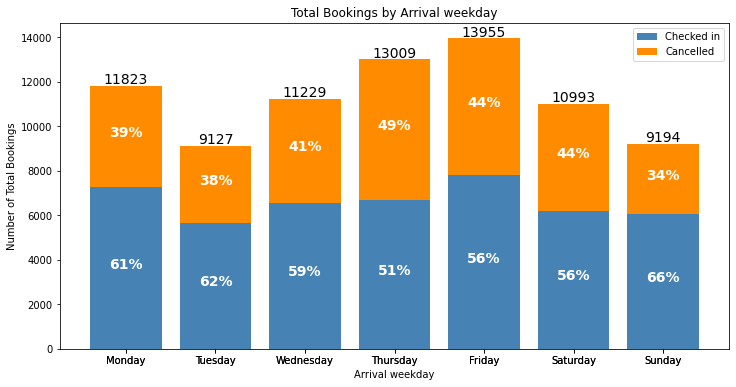

In [37]:
# Cancellation over weekday
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

# Create weekday
df_city['arrival_weekday'] = df['arrival_date_merged'].dt.day_name()

# Group by weekday
bookings_DOW = df_city.groupby(['arrival_weekday', 'is_canceled']).size().reset_index(name='count')


# Pivot the grouped data to create a DataFrame with arrival_date_merged as the index, is_canceled as the columns, and count as the values
pivoted_DOW = bookings_DOW.pivot(index='arrival_weekday', columns='is_canceled', values='count')

# Reorder index
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivoted_DOW = pivoted_DOW.reindex(cats)


# Plot
colors = ['steelblue', 'darkorange']
bottom = np.zeros(len(pivoted_DOW))

for i, col in enumerate(pivoted_DOW.columns):
    ax.bar(pivoted_DOW.index, pivoted_DOW[col], bottom=bottom, color=colors[i])
    bottom += np.array(pivoted_DOW[col])

# Add bar label
    
for_label = pd.DataFrame(pivoted_DOW.to_records())
for_label['Sum'] = for_label['0'] + for_label['1']
for_label['0 %'] = (for_label['0'] / for_label['Sum'])*100
for_label['1 %'] = (for_label['1'] / for_label['Sum'])*100


for i in range(len(for_label['arrival_weekday'])):
    # Overall bar label
    ax.text(i, for_label['Sum'].loc[i] + 100, 
            for_label['Sum'].loc[i], 
            ha='center', 
            color = 'black',
            size = 14)
    # Not canceled
    ax.text(i, for_label['0'].loc[i] / 2, 
            f'{for_label["0 %"].loc[i]:.0f}%', 
            ha='center', 
            color = 'white',
            size = 14,
            weight = 'bold')
    # Canceled
    ax.text(i, for_label['0'].loc[i] + for_label['1'].loc[i] / 2, 
            f'{for_label["1 %"].loc[i]:.0f}%', 
            ha='center', 
            color = 'white',
            size = 14,
           weight = 'bold')
    

# Set the axis labels and title
plt.xlabel('Arrival weekday')
plt.ylabel('Number of Total Bookings')
plt.title('Total Bookings by Arrival weekday')
plt.xticks(bookings_DOW['arrival_weekday'], bookings_DOW['arrival_weekday'])

plt.legend(["Checked in", "Cancelled"])

# Show the plot
plt.show()

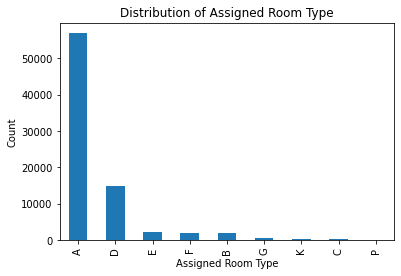

In [38]:
# Assigned_room_type
df_city['assigned_room_type'].value_counts().plot(kind='bar')

# Set the axis labels and title
plt.xlabel('Assigned Room Type')
plt.ylabel('Count')
plt.title('Distribution of Assigned Room Type')

# Show the plot
plt.show()

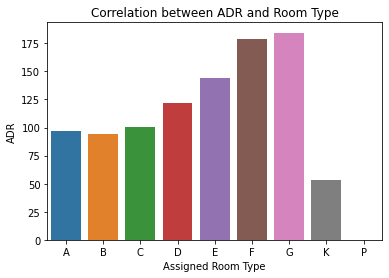

In [39]:
# Group the data by assigned_room_type and calculate the mean ADR for each group
adr_by_room_type = df_city.groupby('assigned_room_type')['adr'].mean()

# Create a grouped bar plot of the mean ADR for each room type
sns.barplot(x=adr_by_room_type.index, y=adr_by_room_type.values)

# Set the axis labels and title
plt.xlabel('Assigned Room Type')
plt.ylabel('ADR')
plt.title('Correlation between ADR and Room Type')

# Show the plot
plt.show()

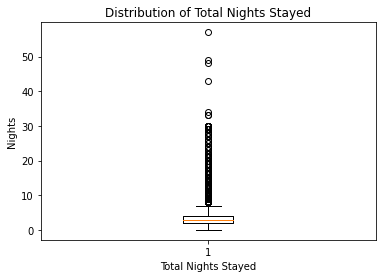

In [40]:
# total_nights_stayed
plt.boxplot(df_city['total_nights_stayed'])

# Set the axis labels and title
plt.xlabel('Total Nights Stayed')
plt.ylabel('Nights')
plt.title('Distribution of Total Nights Stayed')

# Show the plot
plt.show()

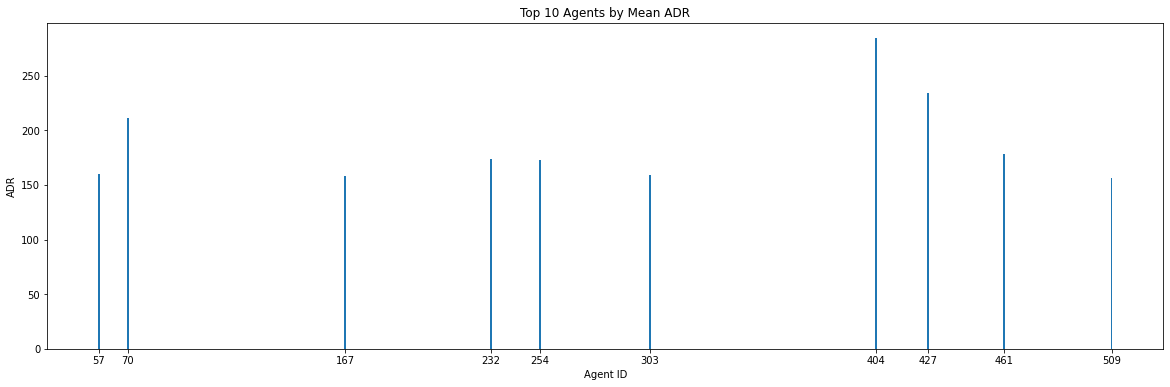

In [41]:
# top 10 agents by average ADR: which agents bring the most high-value guests?

plt.figure(figsize=(20, 6))

# Group the data by agent and calculate the mean ADR for each group
adr_by_agent = df_city.groupby('agent')['adr'].mean().reset_index()

# Sort the data by the mean ADR in descending order
adr_by_agent = adr_by_agent.sort_values('adr', ascending=False)

# Slice the DataFrame to show only the top 10 agents by mean ADR
top_10_agents = adr_by_agent.head(10)

# Create a bar plot of the mean ADR for each of the top 10 agents
plt.bar(top_10_agents['agent'], top_10_agents['adr'])

# Set the axis labels and title
plt.xlabel('Agent ID')
plt.ylabel('ADR')
plt.title('Top 10 Agents by Mean ADR')

# Set the x-axis tick labels to the agent IDs
plt.xticks(top_10_agents['agent'], top_10_agents['agent'])

# Show the plot
plt.show()

<Figure size 1440x720 with 0 Axes>

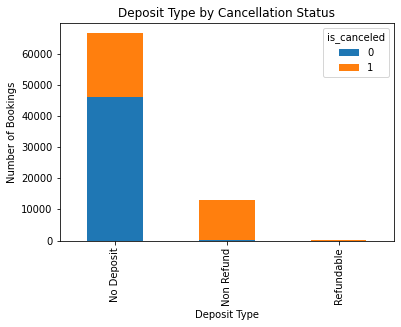

In [42]:
# check correlation between deposit_type and cancellation
plt.figure(figsize=(20, 10))

# Group the data by deposit_type and is_canceled, and count the number of bookings in each group
grouped_data = df_city.groupby(['deposit_type', 'is_canceled']).size().reset_index(name='count')

# Pivot the grouped data to create a DataFrame with deposit_type as the index, is_canceled as the columns, and count as the values
pivoted_data = grouped_data.pivot(index='deposit_type', columns='is_canceled', values='count')

# Create a stacked bar chart of the number of bookings for each deposit type and cancellation status
pivoted_data.plot(kind='bar', stacked=True)

# Set the axis labels and title
plt.xlabel('Deposit Type')
plt.ylabel('Number of Bookings')
plt.title('Deposit Type by Cancellation Status')

# Show the plot
plt.show()

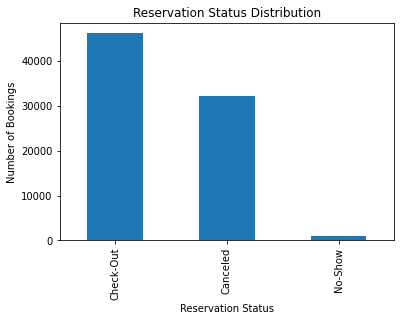

In [43]:
# reservation status

# Count the number of bookings for each reservation status
status_counts = df_city['reservation_status'].value_counts()

# Create a bar chart of the number of bookings for each reservation status
status_counts.plot(kind='bar')

# Set the axis labels and title
plt.xlabel('Reservation Status')
plt.ylabel('Number of Bookings')
plt.title('Reservation Status Distribution')

# Show the plot
plt.show()

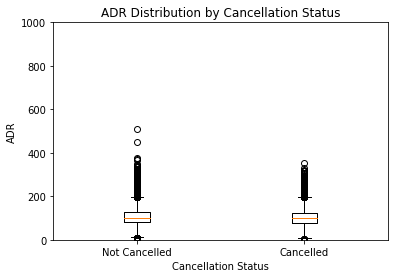

In [44]:
# relationship of cancelled and not cancelled by adr

# Create a box plot of ADR for cancelled and non-cancelled bookings
plt.boxplot([df_city[df_city['is_canceled'] == 0]['adr'], df_city[df_city['is_canceled'] == 1]['adr']], labels=['Not Cancelled', 'Cancelled'])

# Set the axis labels and title
plt.xlabel('Cancellation Status')
plt.ylabel('ADR')
plt.title('ADR Distribution by Cancellation Status')

# Set the y-axis limit to 1000
plt.ylim(0, 1000)

# Show the plot
plt.show()

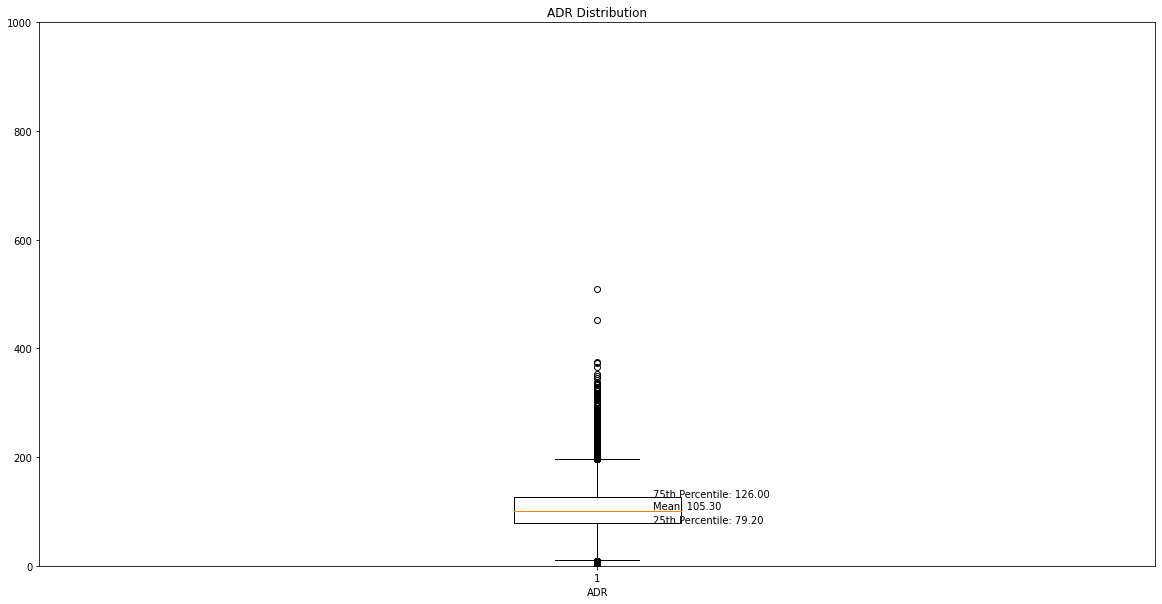

In [45]:
# adr percentiles
plt.figure(figsize=(20, 10))

# Calculate the mean, 25th percentile, and 75th percentile of ADR
mean = df_city['adr'].mean()
p25 = df_city['adr'].quantile(0.25)
p75 = df_city['adr'].quantile(0.75)

# Create a box plot of ADR
plt.boxplot(df_city['adr'])

# Add labels for the mean, 25th percentile, and 75th percentile
plt.text(1.05, mean, f'Mean: {mean:.2f}')
plt.text(1.05, p25, f'25th Percentile: {p25:.2f}')
plt.text(1.05, p75, f'75th Percentile: {p75:.2f}')

# Set the axis labels and title
plt.xlabel('ADR')
plt.title('ADR Distribution')
plt.ylim(0, 1000)


# Show the plot
plt.show()


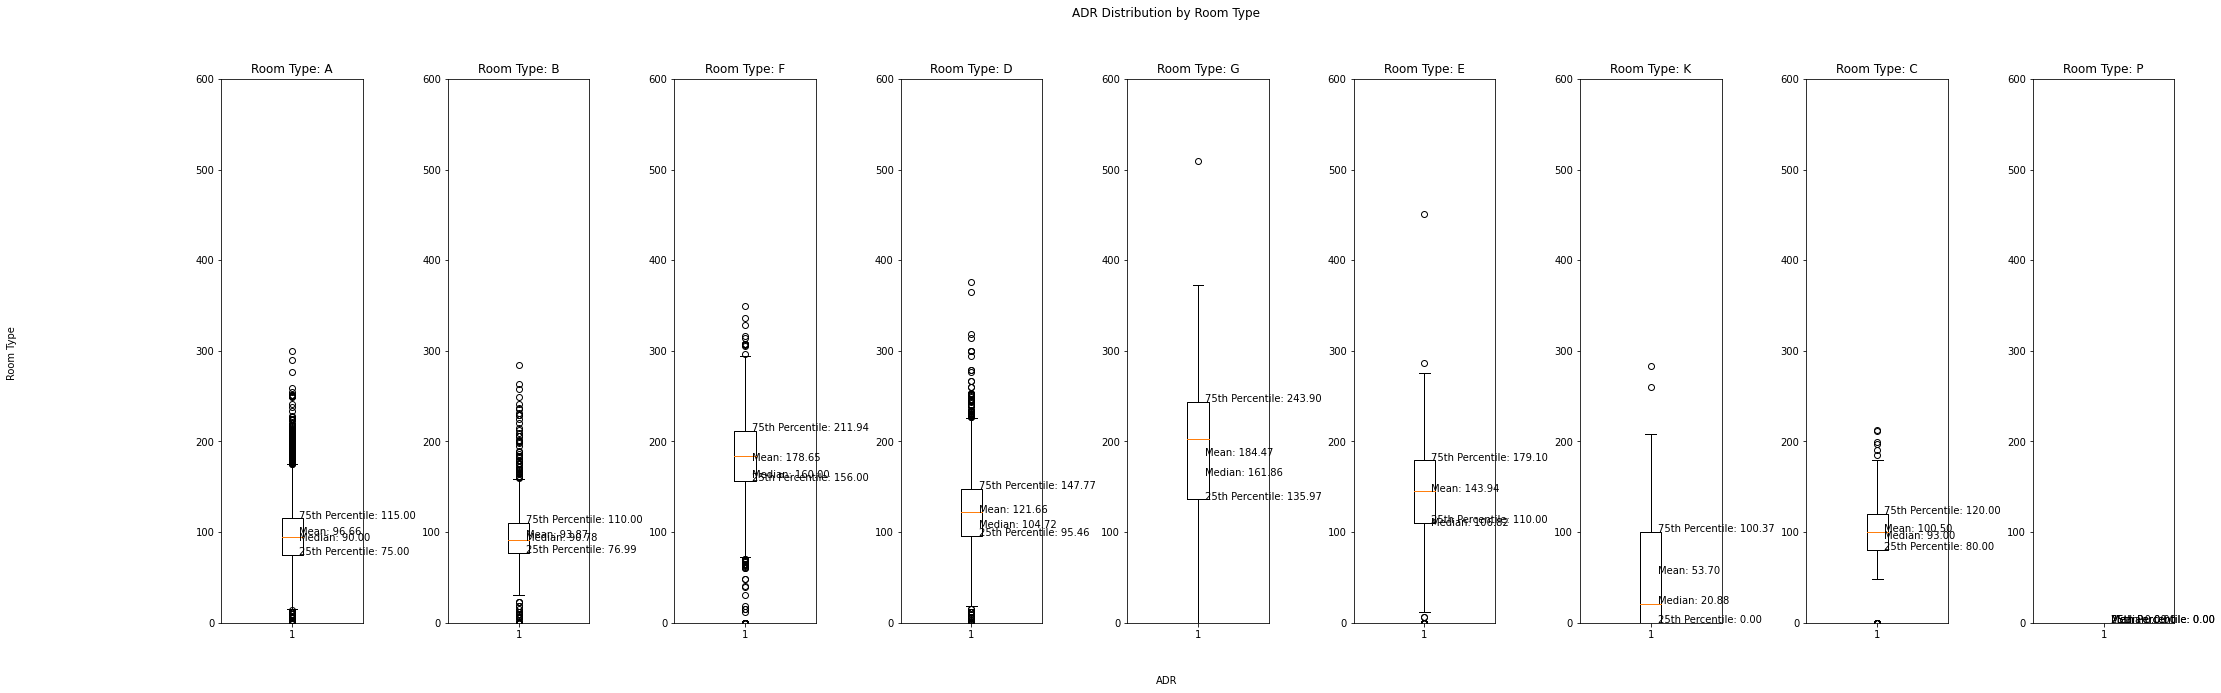

In [46]:
# adr distribution by room type

# Create a figure with 5 subplots, arranged in a 1x5 grid
fig, axs = plt.subplots(ncols=9, figsize=(35, 10))

# Loop over each room type, and create a box plot of ADR for that room type
for i, room_type in enumerate(df_city['assigned_room_type'].unique()):
    axs[i].boxplot(df_city[df_city['assigned_room_type'] == room_type]['adr'])
    axs[i].set_title(f'Room Type: {room_type}')
    
    # Add labels for the mean, 25th percentile, and 75th percentile
    mean = df_city[df_city['assigned_room_type'] == room_type]['adr'].mean()
    median = df[df['assigned_room_type'] == room_type]['adr'].median()
    p25 = df_city[df_city['assigned_room_type'] == room_type]['adr'].quantile(0.25)
    p75 = df_city[df_city['assigned_room_type'] == room_type]['adr'].quantile(0.75)
    axs[i].text(1.05, mean, f'Mean: {mean:.2f}')
    axs[i].text(1.05, median, f'Median: {median:.2f}')
    axs[i].text(1.05, p25, f'25th Percentile: {p25:.2f}')
    axs[i].text(1.05, p75, f'75th Percentile: {p75:.2f}')
    axs[i].set_ylim(0, 600)


# Set the axis labels and title for the entire figure
fig.text(0.5, 0.04, 'ADR', ha='center')
fig.text(0.04, 0.5, 'Room Type', va='center', rotation='vertical')
fig.suptitle('ADR Distribution by Room Type')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.6)

# Show the plot
plt.show()

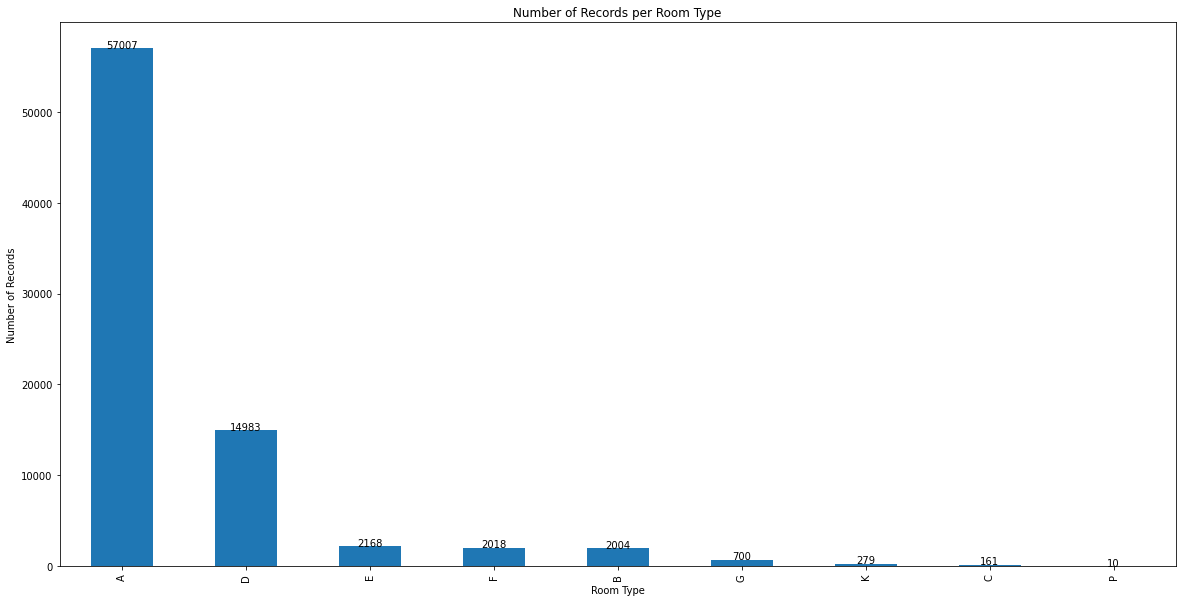

In [47]:
plt.figure(figsize=(20, 10))


# Count the number of occurrences of each room type
room_type_counts = df_city['assigned_room_type'].value_counts()

# Create a bar chart of the room type counts
ax = room_type_counts.plot(kind='bar')

# Set the axis labels and title
ax.set_xlabel('Room Type')
ax.set_ylabel('Number of Records')
ax.set_title('Number of Records per Room Type')

# Add data labels to the top of each bar
for i, v in enumerate(room_type_counts):
    ax.text(i, v + 10, str(v), ha='center')

# Show the plot
plt.show()

## 4.0 Building Models
----------------------------------

### 4.1 Overbooking Implementation Model

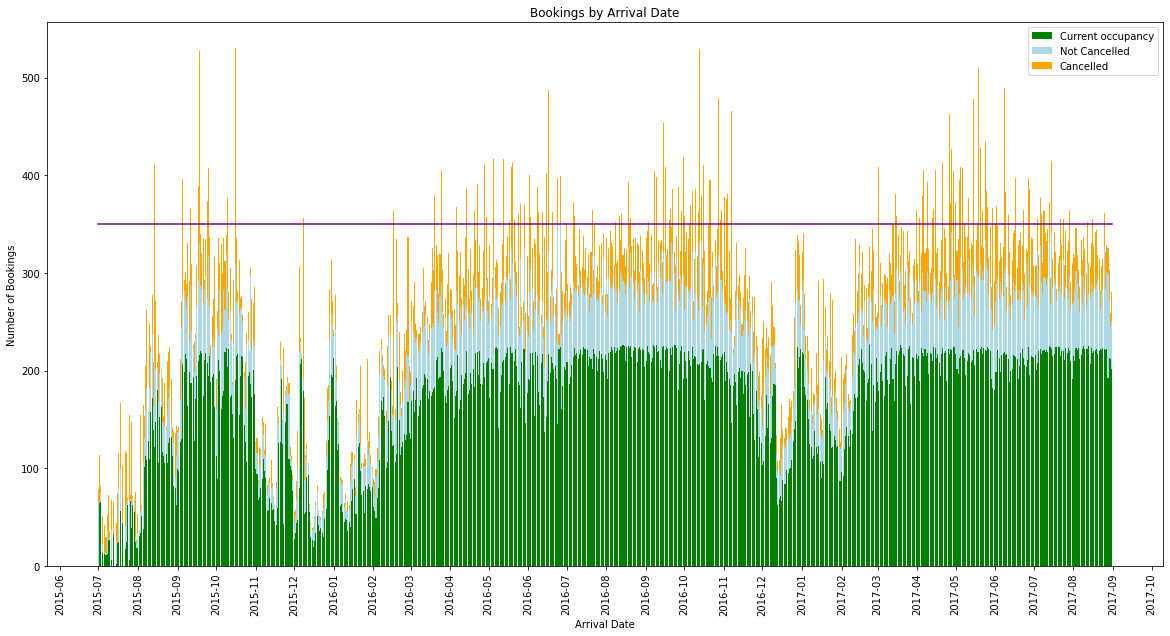

In [49]:
# show total bookings and cancelled bookings in bar chart
plt.figure(figsize=(20, 10))
grouped_data = df_city.groupby(['arrival_date_merged', 'is_canceled']).size().reset_index(name='count')
pivoted_data = grouped_data.pivot(index='arrival_date_merged', columns='is_canceled', values='count')

df_city_occu = pd.DataFrame(list(zip(list(city_arr), list(city_date_list))), columns = ['city_occu','arrival_date_merged']) # for merging
df_merged = pivoted_data.merge(df_city_occu, how = 'left', on = ['arrival_date_merged'])
df_merged['occu_before_arrival'] = df_merged['city_occu'] - df_merged[0] 
df_merged['max_occupancy'] = 350

plt.bar(df_merged['arrival_date_merged'], df_merged['occu_before_arrival'], color='green')
plt.bar(df_merged['arrival_date_merged'], df_merged[0], bottom= df_merged['occu_before_arrival'], color='lightblue')
plt.bar(df_merged['arrival_date_merged'], df_merged[1], bottom= df_merged['occu_before_arrival'] + df_merged[0], color='orange')

plt.xlabel('Arrival Date')
plt.ylabel('Number of Bookings')
plt.title('Bookings by Arrival Date')

plt.legend(["Current occupancy", "Not Cancelled", "Cancelled"])
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1)) 
plt.plot(df_merged['arrival_date_merged'], df_merged['max_occupancy'], color='purple')

plt.show()

From occupancy chart, we will extract records where demand/occupancy is the highest (i.e. peak period). Hence, we will exclude 2015-11 to 2016-02 and 2016-12 to 2017-02 as they have lower than average occupancy, and use the remaining records (peak demand) to build our overbooking model.

In [50]:
# Create a boolean mask to filter out the rows corresponding to the specified months (peak period)
exclude_mask = ((df_city['arrival_date_merged'].dt.month.isin([7, 8, 11, 12]) & (df_city['arrival_date_merged'].dt.year == 2015)) | \
                (df_city['arrival_date_merged'].dt.month.isin([1, 2]) & (df_city['arrival_date_merged'].dt.year == 2016)) | \
                (df_city['arrival_date_merged'].dt.month.isin([12]) & (df_city['arrival_date_merged'].dt.year == 2016)) | \
                (df_city['arrival_date_merged'].dt.month.isin([1, 2]) & (df_city['arrival_date_merged'].dt.year == 2017)))

# Create the new DataFrame by applying the boolean mask
df_city_peak = df_city[~exclude_mask].copy()
df_city_peak

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_CompanyBooked,arrival_date_merged,total_nights_stayed,arrival_weekday
42138,City Hotel,0,1,2015,September,36,1,0,1,1,0,0,BB,DEU,Online TA,TA/TO,0,0,0,A,D,0,No Deposit,9,NaN,0,Contract,95.0,0,1,Check-Out,2015-09-02,0,2015-09-01,1,Tuesday
42139,City Hotel,0,8,2015,September,36,1,0,2,1,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,D,0,No Deposit,7,NaN,0,Transient,73.2,0,0,Check-Out,2015-09-03,0,2015-09-01,2,Tuesday
42140,City Hotel,0,0,2015,September,36,1,0,1,2,0,0,BB,PRT,Complementary,Direct,0,0,0,A,E,0,No Deposit,0,NaN,0,Transient,0.0,0,0,Check-Out,2015-09-02,0,2015-09-01,1,Tuesday
42141,City Hotel,0,1,2015,September,36,1,0,1,1,0,0,BB,PRT,Complementary,Direct,0,0,0,A,F,0,No Deposit,0,45.0,0,Transient,0.0,0,1,Check-Out,2015-09-02,1,2015-09-01,1,Tuesday
42142,City Hotel,0,1,2015,September,36,1,0,1,1,0,0,BB,PRT,Complementary,Direct,0,0,0,A,A,0,No Deposit,0,45.0,0,Transient,0.0,0,1,Check-Out,2015-09-02,1,2015-09-01,1,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394,NaN,0,Transient,96.1,0,0,Check-Out,2017-09-06,0,2017-08-30,7,Wednesday
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9,NaN,0,Transient,225.4,0,2,Check-Out,2017-09-07,0,2017-08-31,7,Thursday
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,NaN,0,Transient,157.7,0,4,Check-Out,2017-09-07,0,2017-08-31,7,Thursday
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89,NaN,0,Transient,104.4,0,0,Check-Out,2017-09-07,0,2017-08-31,7,Thursday


In [51]:
df_city_peak[df_city_peak['arrival_date_merged'].dt.year == 2016]['arrival_date_merged'].nunique()

275

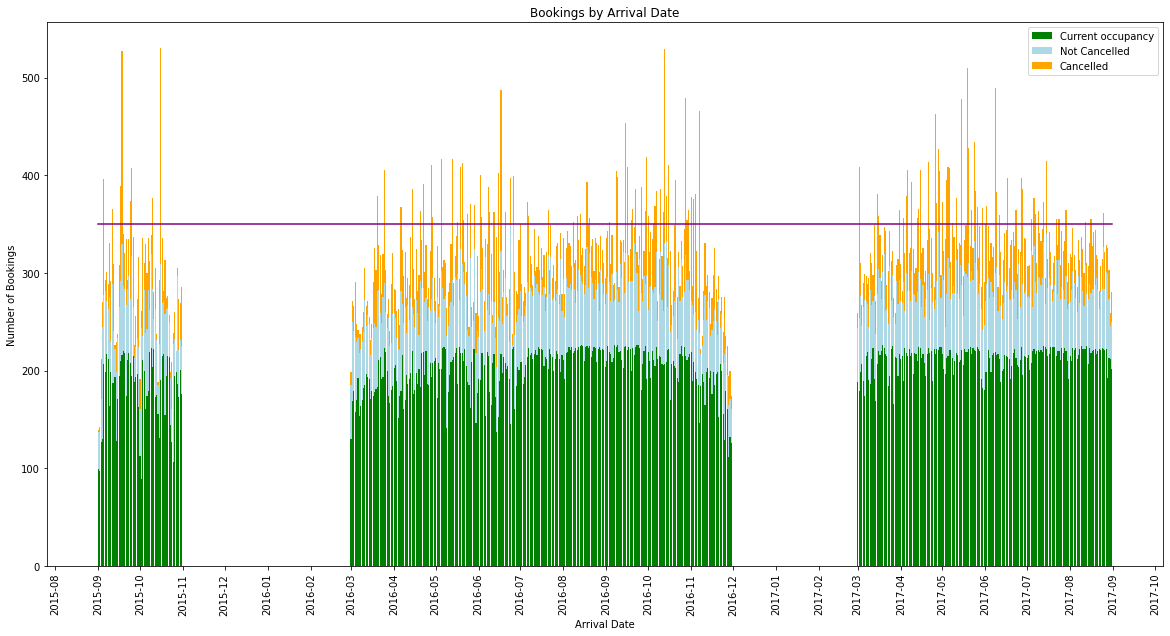

In [52]:
# Check filtered peak months
plt.figure(figsize=(20, 10))

exclude_mask = ((df_merged['arrival_date_merged'].dt.month.isin([7, 8, 11, 12]) & (df_merged['arrival_date_merged'].dt.year == 2015)) | \
                (df_merged['arrival_date_merged'].dt.month.isin([1, 2]) & (df_merged['arrival_date_merged'].dt.year == 2016)) | \
                (df_merged['arrival_date_merged'].dt.month.isin([12]) & (df_merged['arrival_date_merged'].dt.year == 2016)) | \
                (df_merged['arrival_date_merged'].dt.month.isin([1, 2]) & (df_merged['arrival_date_merged'].dt.year == 2017)))

df_merged = df_merged[~exclude_mask].copy()
df_merged['max_occupancy'] = 350

plt.bar(df_merged['arrival_date_merged'], df_merged['occu_before_arrival'], color='green')
plt.bar(df_merged['arrival_date_merged'], df_merged[0], bottom= df_merged['occu_before_arrival'], color='lightblue')
plt.bar(df_merged['arrival_date_merged'], df_merged[1], bottom= df_merged['occu_before_arrival'] + df_merged[0], color='orange')

plt.xlabel('Arrival Date')
plt.ylabel('Number of Bookings')
plt.title('Bookings by Arrival Date')

plt.legend(["Current occupancy", "Not Cancelled", "Cancelled"])
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1)) 
plt.plot(df_merged['arrival_date_merged'], df_merged['max_occupancy'], color='purple')

plt.show()

Next, we categorize the rooms into 2 main types - Premium and Standard. We will group them based on their cost distribution and visitor count.

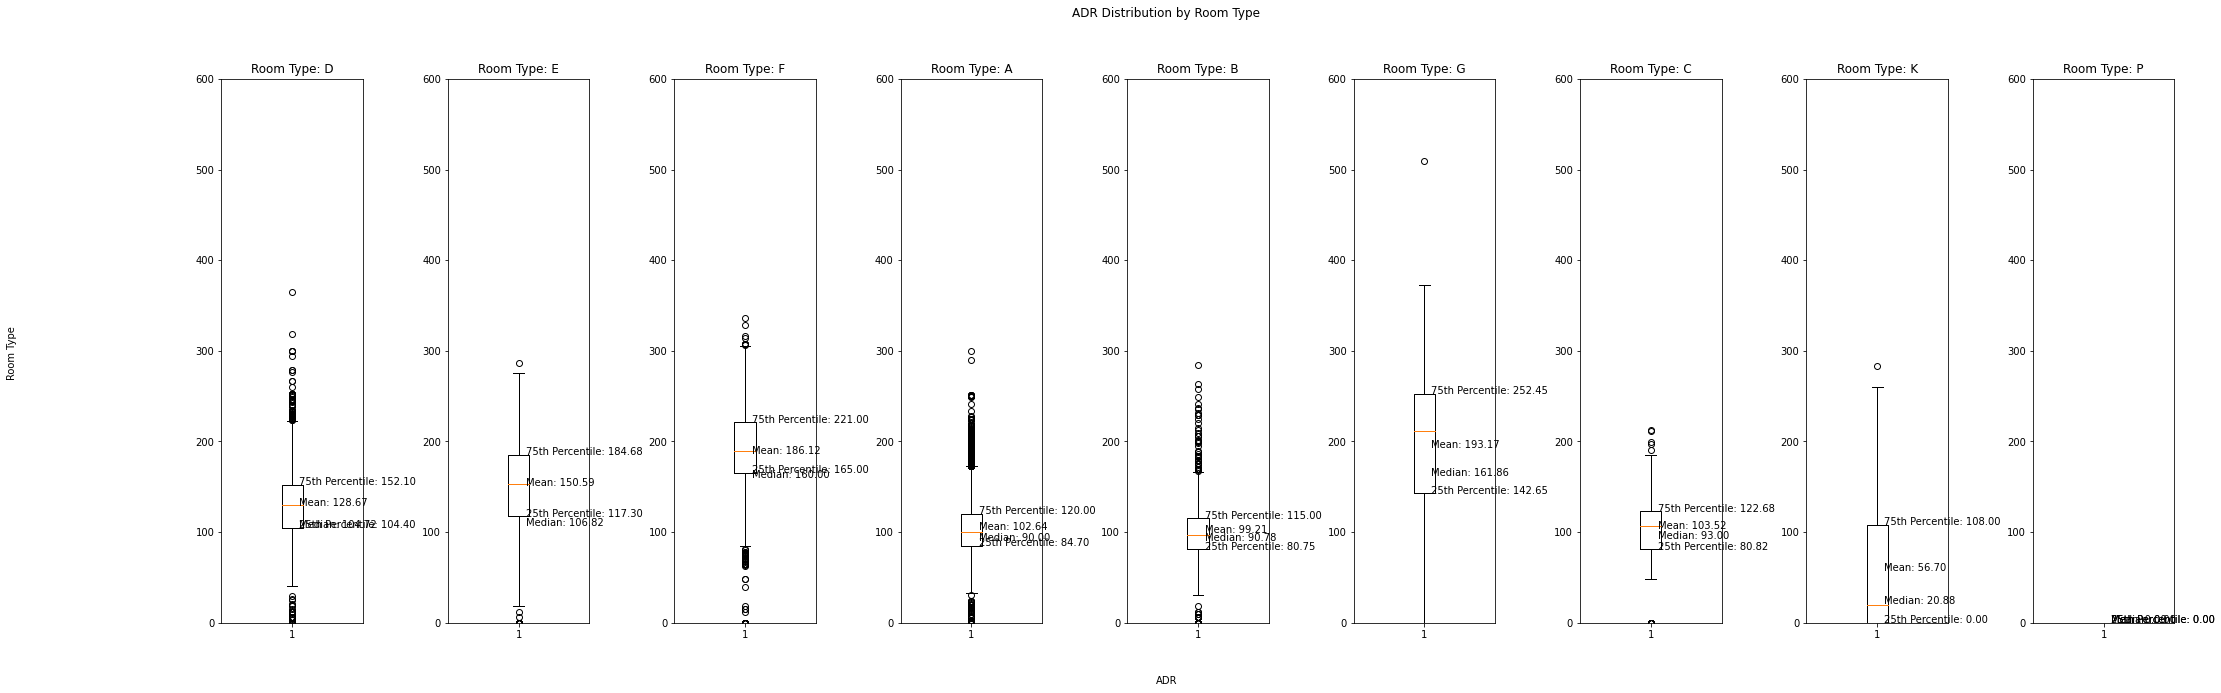

In [53]:
# adr distribution by room type

# Create a figure with 5 subplots, arranged in a 1x5 grid
fig, axs = plt.subplots(ncols=9, figsize=(35, 10))

# Loop over each room type, and create a box plot of ADR for that room type
for i, room_type in enumerate(df_city_peak['assigned_room_type'].unique()):
    axs[i].boxplot(df_city_peak[df_city_peak['assigned_room_type'] == room_type]['adr'])
    axs[i].set_title(f'Room Type: {room_type}')
    
    # Add labels for the mean, 25th percentile, and 75th percentile
    mean = df_city_peak[df_city_peak['assigned_room_type'] == room_type]['adr'].mean()
    median = df[df['assigned_room_type'] == room_type]['adr'].median()
    p25 = df_city_peak[df_city_peak['assigned_room_type'] == room_type]['adr'].quantile(0.25)
    p75 = df_city_peak[df_city_peak['assigned_room_type'] == room_type]['adr'].quantile(0.75)
    axs[i].text(1.05, mean, f'Mean: {mean:.2f}')
    axs[i].text(1.05, median, f'Median: {median:.2f}')
    axs[i].text(1.05, p25, f'25th Percentile: {p25:.2f}')
    axs[i].text(1.05, p75, f'75th Percentile: {p75:.2f}')
    axs[i].set_ylim(0, 600)


# Set the axis labels and title for the entire figure
fig.text(0.5, 0.04, 'ADR', ha='center')
fig.text(0.04, 0.5, 'Room Type', va='center', rotation='vertical')
fig.suptitle('ADR Distribution by Room Type')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.6)

# Show the plot
plt.show()

We can group the rooms into two categories: Premium and Standard. Premium rooms, denoted by room types B, E, F and G, typically have higher prices and lower booking counts compared to Standard rooms, which include room types A, C, D, K, and P.

<br>Premium: B, E, F, G
<br>Standard: A, C, D, K, P

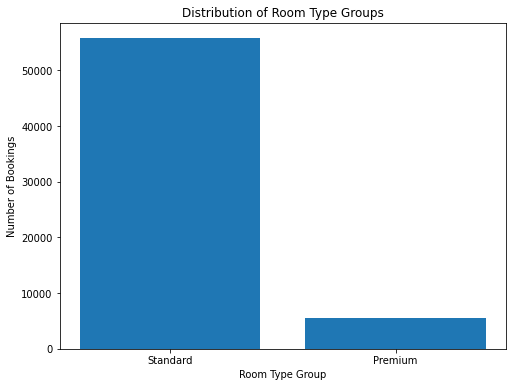

In [54]:

# Map each room type to its corresponding group
room_type_mapping = {
    'F': 'Premium',
    'G': 'Premium',
    'E': 'Premium',
    'B': 'Premium',
    'A': 'Standard',
    'C': 'Standard',
    'D': 'Standard',
    'K': 'Standard',
    'P': 'Standard'
}
df_city_peak['room_type_group'] = df_city_peak['assigned_room_type'].replace(room_type_mapping)

# Count the number of occurrences of each group
group_counts = df_city_peak['room_type_group'].value_counts()

# Plot a bar chart of the distribution of room type groups
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(group_counts.index, group_counts.values)
ax.set_xlabel('Room Type Group')
ax.set_ylabel('Number of Bookings')
ax.set_title('Distribution of Room Type Groups')
plt.show()

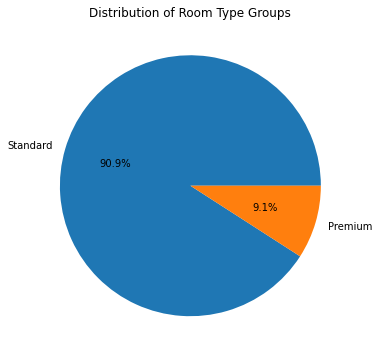

In [55]:
# Map each room type to its corresponding group
room_type_mapping = {
    'F': 'Premium',
    'G': 'Premium',
    'A': 'Standard',
    'B': 'Premium',
    'C': 'Standard',
    'D': 'Standard',
    'E': 'Premium',
    'K': 'Standard',
    'P': 'Standard'
}
df_city_peak['room_type_group'] = df_city_peak['assigned_room_type'].replace(room_type_mapping)

# Count the number of occurrences of each group
group_counts = df_city_peak['room_type_group'].value_counts()

# Calculate the percentage of each group
group_percentages = group_counts / group_counts.sum() * 100

# Plot a pie chart of the distribution of room type groups
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(group_percentages.values, labels=group_percentages.index, autopct='%1.1f%%')
ax.set_title('Distribution of Room Type Groups')
plt.show()

Therefore, based on the distribution, there are 320 standard and 30 premium rooms. (numbers rounded up)

In [56]:
len(df_city_peak)

61384

In [57]:
df_city_peak.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_CompanyBooked,arrival_date_merged,total_nights_stayed,arrival_weekday,room_type_group
42138,City Hotel,0,1,2015,September,36,1,0,1,1,0,0,BB,DEU,Online TA,TA/TO,0,0,0,A,D,0,No Deposit,9,NaN,0,Contract,95.0,0,1,Check-Out,2015-09-02,0,2015-09-01,1,Tuesday,Standard
42139,City Hotel,0,8,2015,September,36,1,0,2,1,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,D,0,No Deposit,7,NaN,0,Transient,73.2,0,0,Check-Out,2015-09-03,0,2015-09-01,2,Tuesday,Standard
42140,City Hotel,0,0,2015,September,36,1,0,1,2,0,0,BB,PRT,Complementary,Direct,0,0,0,A,E,0,No Deposit,0,NaN,0,Transient,0.0,0,0,Check-Out,2015-09-02,0,2015-09-01,1,Tuesday,Premium
42141,City Hotel,0,1,2015,September,36,1,0,1,1,0,0,BB,PRT,Complementary,Direct,0,0,0,A,F,0,No Deposit,0,45.0,0,Transient,0.0,0,1,Check-Out,2015-09-02,1,2015-09-01,1,Tuesday,Premium
42142,City Hotel,0,1,2015,September,36,1,0,1,1,0,0,BB,PRT,Complementary,Direct,0,0,0,A,A,0,No Deposit,0,45.0,0,Transient,0.0,0,1,Check-Out,2015-09-02,1,2015-09-01,1,Tuesday,Standard


In [58]:
df_city_peak.reservation_status.unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

### Building the Booking_Canceled_Assigned Summary Table
-------------------------------------

In [60]:
df_city_assigned_summary = df_city_peak[['is_canceled', 'arrival_date_merged', 'total_nights_stayed','reserved_room_type']]

In [61]:
df_city_assigned_summary

,is_canceled,arrival_date_merged,total_nights_stayed,reserved_room_type
42138,0,2015-09-01,1,A
42139,0,2015-09-01,2,A
42140,0,2015-09-01,1,A
42141,0,2015-09-01,1,A
42142,0,2015-09-01,1,A
...,...,...,...,...
119385,0,2017-08-30,7,A
119386,0,2017-08-31,7,E
119387,0,2017-08-31,7,D
119388,0,2017-08-31,7,A


In [62]:
# Define the mapping between reserved_room_type and room_type
room_type_mapping = {'F': 'Premium',
                     'G': 'Premium',
                     'A': 'Standard',
                     'B': 'Premium',
                     'C': 'Standard',
                     'D': 'Standard',
                     'E': 'Premium',
                     'K': 'Standard'}

# Create a new column 'room_type' by mapping 'reserved_room_type' to 'room_type'
df_city_assigned_summary['room_type'] = df_city_assigned_summary['reserved_room_type'].map(room_type_mapping)

# Drop the 'reserved_room_type' column
# df_city_uplift_summary.drop('reserved_room_type', axis=1, inplace=True)
df_city_assigned_summary

<ipython-input-62-d7e6bb44a07a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city_assigned_summary['room_type'] = df_city_assigned_summary['reserved_room_type'].map(room_type_mapping)


,is_canceled,arrival_date_merged,total_nights_stayed,reserved_room_type,room_type
42138,0,2015-09-01,1,A,Standard
42139,0,2015-09-01,2,A,Standard
42140,0,2015-09-01,1,A,Standard
42141,0,2015-09-01,1,A,Standard
42142,0,2015-09-01,1,A,Standard
...,...,...,...,...,...
119385,0,2017-08-30,7,A,Standard
119386,0,2017-08-31,7,E,Premium
119387,0,2017-08-31,7,D,Standard
119388,0,2017-08-31,7,A,Standard


In [63]:
df_city_assigned_summary = df_city_assigned_summary[['is_canceled', 'arrival_date_merged','total_nights_stayed','room_type']]

df_city_assigned_summary

,is_canceled,arrival_date_merged,total_nights_stayed,room_type
42138,0,2015-09-01,1,Standard
42139,0,2015-09-01,2,Standard
42140,0,2015-09-01,1,Standard
42141,0,2015-09-01,1,Standard
42142,0,2015-09-01,1,Standard
...,...,...,...,...
119385,0,2017-08-30,7,Standard
119386,0,2017-08-31,7,Premium
119387,0,2017-08-31,7,Standard
119388,0,2017-08-31,7,Standard


For the next table, df_city_assigned_temp, we assume that in the hotel backend booking system, each booking has to be made on a day-to-day level (i.e. if a customer made a 3 day booking, there will be 3 transactions in the system -> this is to facilitate our summary table later on in the model building)

Hence, logic is that for every is_canceled = 0 and total_nights_stayed > 1 transaction, we create additional rows in the new dataframe that accounts for every incremental night.

In [64]:
import pandas as pd
from datetime import timedelta

# Initialize an empty dataframe with the same columns
df_city_assigned_temp = pd.DataFrame(columns=['is_canceled', 'arrival_date_merged', 'total_nights_stayed', 'room_type'])

# Iterate through each row in the original dataframe
for index, row in df_city_assigned_summary.iterrows():
    # Check if is_canceled = 0 and total_nights_stayed > 1
    if row['is_canceled'] == 0 and row['total_nights_stayed'] > 1:
        # Create n number of rows in the new dataframe
        for i in range(1, row['total_nights_stayed']):
            # Calculate the new arrival_date_merged
            new_arrival_date_merged = pd.to_datetime(row['arrival_date_merged']) + timedelta(days=i)
            
            # Create a new row with the updated arrival_date_merged
            new_row = {
                'is_canceled': row['is_canceled'],
                'arrival_date_merged': new_arrival_date_merged,
                'total_nights_stayed': row['total_nights_stayed'],
                'room_type': row['room_type']
            }
            
            # Append the new row to the df_city_uplift_temp dataframe
            df_city_assigned_temp = df_city_assigned_temp.append(new_row, ignore_index=True)

            
df_city_assigned_temp

,is_canceled,arrival_date_merged,total_nights_stayed,room_type
0,0,2015-09-02,2,Standard
1,0,2015-09-02,4,Premium
2,0,2015-09-03,4,Premium
3,0,2015-09-04,4,Premium
4,0,2015-09-02,4,Standard
...,...,...,...,...
69993,0,2017-09-02,9,Standard
69994,0,2017-09-03,9,Standard
69995,0,2017-09-04,9,Standard
69996,0,2017-09-05,9,Standard


Next, we append both tables to get full table

In [66]:
df_city_assigned_total = df_city_assigned_summary.append(df_city_assigned_temp, ignore_index=True)
df_city_assigned_total

,is_canceled,arrival_date_merged,total_nights_stayed,room_type
0,0,2015-09-01,1,Standard
1,0,2015-09-01,2,Standard
2,0,2015-09-01,1,Standard
3,0,2015-09-01,1,Standard
4,0,2015-09-01,1,Standard
...,...,...,...,...
131377,0,2017-09-02,9,Standard
131378,0,2017-09-03,9,Standard
131379,0,2017-09-04,9,Standard
131380,0,2017-09-05,9,Standard


Next, we create the summary table to analyze booking / cancellation / uplift rates.

In [67]:
# Create new columns 'premium_rooms_booked', 'premium_rooms_canceled', 'standard_rooms_booked', 'standard_rooms_canceled'
df_city_assigned_total['premium_rooms_booked'] = ((df_city_assigned_total['is_canceled'] > -1) & (df_city_assigned_total['room_type'] == 'Premium')).astype(int)
df_city_assigned_total['premium_rooms_canceled'] = ((df_city_assigned_total['is_canceled'] == 1) & (df_city_assigned_total['room_type'] == 'Premium')).astype(int)
df_city_assigned_total['standard_rooms_booked'] = ((df_city_assigned_total['is_canceled'] > -1) & (df_city_assigned_total['room_type'] == 'Standard')).astype(int)
df_city_assigned_total['standard_rooms_canceled'] = ((df_city_assigned_total['is_canceled'] == 1) & (df_city_assigned_total['room_type'] == 'Standard')).astype(int)

In [68]:
df_city_assigned_total

,is_canceled,arrival_date_merged,total_nights_stayed,room_type,premium_rooms_booked,premium_rooms_canceled,standard_rooms_booked,standard_rooms_canceled
0,0,2015-09-01,1,Standard,0,0,1,0
1,0,2015-09-01,2,Standard,0,0,1,0
2,0,2015-09-01,1,Standard,0,0,1,0
3,0,2015-09-01,1,Standard,0,0,1,0
4,0,2015-09-01,1,Standard,0,0,1,0
...,...,...,...,...,...,...,...,...
131377,0,2017-09-02,9,Standard,0,0,1,0
131378,0,2017-09-03,9,Standard,0,0,1,0
131379,0,2017-09-04,9,Standard,0,0,1,0
131380,0,2017-09-05,9,Standard,0,0,1,0


In [69]:
df_city_assigned_total = df_city_assigned_total[['arrival_date_merged', 'room_type', 'premium_rooms_booked', 'premium_rooms_canceled', 'standard_rooms_booked', 'standard_rooms_canceled']]
df_city_assigned_total

,arrival_date_merged,room_type,premium_rooms_booked,premium_rooms_canceled,standard_rooms_booked,standard_rooms_canceled
0,2015-09-01,Standard,0,0,1,0
1,2015-09-01,Standard,0,0,1,0
2,2015-09-01,Standard,0,0,1,0
3,2015-09-01,Standard,0,0,1,0
4,2015-09-01,Standard,0,0,1,0
...,...,...,...,...,...,...
131377,2017-09-02,Standard,0,0,1,0
131378,2017-09-03,Standard,0,0,1,0
131379,2017-09-04,Standard,0,0,1,0
131380,2017-09-05,Standard,0,0,1,0


In [70]:
# Group the DataFrame by 'arrival_date_merged' and sum up the other columns
grouped = df_city_assigned_total.groupby('arrival_date_merged').sum()

# Reset the index to keep the column names
result = grouped.reset_index()

df_city_assigned_total = grouped
df_city_assigned_total


,premium_rooms_booked,premium_rooms_canceled,standard_rooms_booked,standard_rooms_canceled
arrival_date_merged,,,,
2015-09-01,7,1,33,1
2015-09-02,7,0,68,5
2015-09-03,13,0,131,41
2015-09-04,11,0,205,25
2015-09-05,14,0,298,119
...,...,...,...,...
2017-09-02,8,0,77,0
2017-09-03,4,0,31,0
2017-09-04,2,0,7,0


In [73]:
df_city_assigned_total['premium_rooms_assigned'] = df_city_assigned_total['premium_rooms_booked'] - df_city_assigned_total['premium_rooms_canceled']
df_city_assigned_total['standard_rooms_assigned'] = df_city_assigned_total['standard_rooms_booked'] - df_city_assigned_total['standard_rooms_canceled']
df_city_assigned_total['premium_capacity'] = 30
df_city_assigned_total['standard_capacity'] = 320

df_city_assigned_total

,premium_rooms_booked,premium_rooms_canceled,standard_rooms_booked,standard_rooms_canceled,premium_rooms_assigned,standard_rooms_assigned,premium_capacity,standard_capacity
arrival_date_merged,,,,,,,,
2015-09-01,7,1,33,1,6,32,30,320
2015-09-02,7,0,68,5,7,63,30,320
2015-09-03,13,0,131,41,13,90,30,320
2015-09-04,11,0,205,25,11,180,30,320
2015-09-05,14,0,298,119,14,179,30,320
...,...,...,...,...,...,...,...,...
2017-09-02,8,0,77,0,8,77,30,320
2017-09-03,4,0,31,0,4,31,30,320
2017-09-04,2,0,7,0,2,7,30,320


We've pivoted our city hotel dataset by booking_date, which allows us to track number of rooms per room type that were booked, cancelled, and their respective uplift (booking - cancelled)

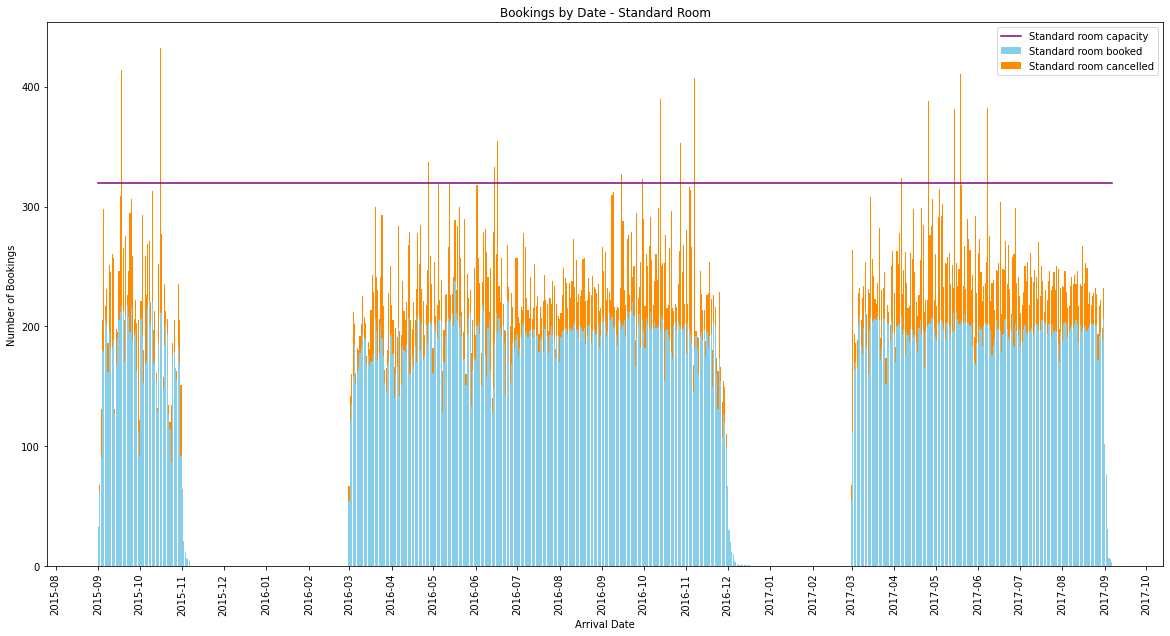

In [90]:
# show total bookings and cancelled bookings in bar chart
plt.figure(figsize=(20, 10))


plt.bar( x =df_city_assigned_total.index, height = df_city_assigned_total['standard_rooms_assigned'], color='skyblue')
plt.bar(x =df_city_assigned_total.index, height = df_city_assigned_total['standard_rooms_canceled'], bottom= df_city_assigned_total['standard_rooms_assigned'], color='darkorange')

# Set the axis labels and title
plt.xlabel('Arrival Date')
plt.ylabel('Number of Bookings')
plt.title('Bookings by Date - Standard Room')

# Plot line chart of max hotel capacity 
plt.plot(df_city_assigned_total['standard_capacity'], color='purple')

# Plot legend
plt.legend(["Standard room capacity","Standard room booked", "Standard room cancelled"])
            # , "Premium room booked", "Premium room cancelled"]

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Set xticks interval
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1)) 


# Show the plot
plt.show()

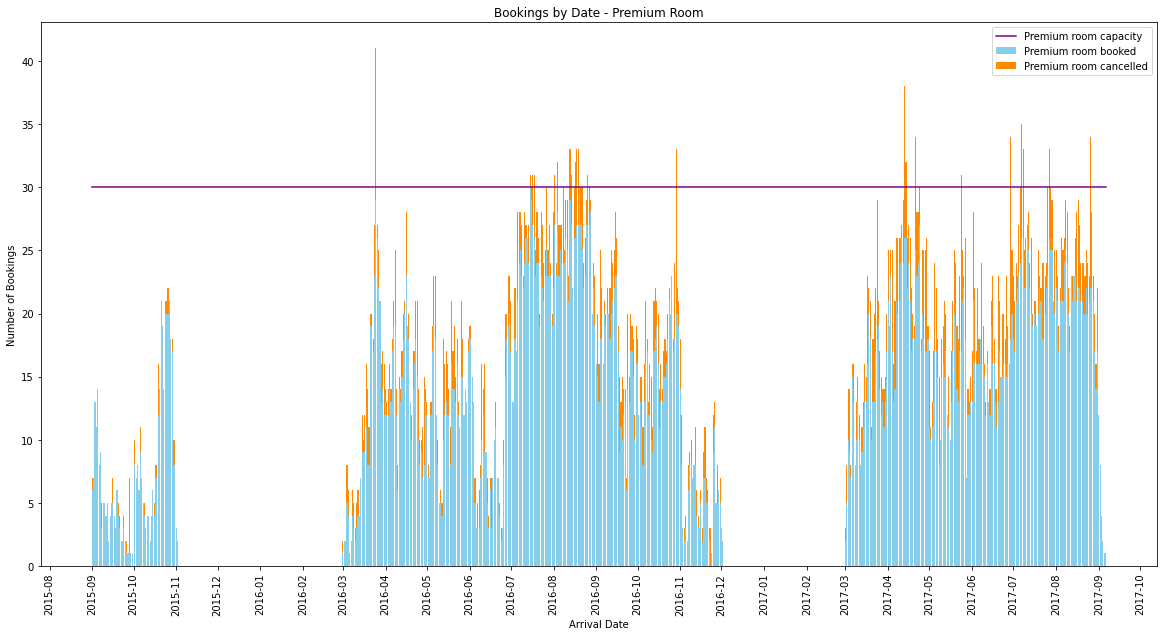

In [92]:
# show total bookings and cancelled bookings in bar chart
plt.figure(figsize=(20, 10))

plt.bar(x =df_city_assigned_total.index, height = df_city_assigned_total['premium_rooms_assigned'], color='skyblue')
plt.bar(x =df_city_assigned_total.index, height = df_city_assigned_total['premium_rooms_canceled'], bottom= df_city_assigned_total['premium_rooms_assigned'], color='darkorange')

# Set the axis labels and title
plt.xlabel('Arrival Date')
plt.ylabel('Number of Bookings')
plt.title('Bookings by Date - Premium Room')

# Plot line chart of max hotel capacity 
plt.plot(df_city_assigned_total['premium_capacity'], color='purple')

# Plot legend
plt.legend(["Premium room capacity", "Premium room booked", "Premium room cancelled"])

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Set xticks interval
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1)) 


# Show the plot
plt.show()

### Building the Overbooking Model
-------------------------------------

In [93]:
# Determine p, probability of cancellation (for each room type – Premium, Standard)

# Calculate the total sum across all booking dates
total_sum = df_city_assigned_total[['premium_rooms_booked', 'premium_rooms_canceled', 'standard_rooms_booked', 'standard_rooms_canceled']].sum()

# Create a new DataFrame with one row and transpose it
df_city_total_sum = total_sum

# Display the new DataFrame
df_city_total_sum

premium_rooms_booked         9068
premium_rooms_canceled       1379
standard_rooms_booked      122307
standard_rooms_canceled     24121
dtype: int64

Cancellation rate for premium rooms
----------------------------------------

In [94]:
premium_cancellation = df_city_total_sum['premium_rooms_canceled'] / df_city_total_sum['premium_rooms_booked']
premium_cancellation = round(premium_cancellation, 4)
p_premium = premium_cancellation
q_premium = round(1 - p_premium, 4)
p_premium, q_premium

(0.1521, 0.8479)

Cancellation rate for standard rooms
----------------------------------------------

In [95]:
standard_cancellation = df_city_total_sum['standard_rooms_canceled'] / df_city_total_sum['standard_rooms_booked']
standard_cancellation = round(standard_cancellation, 4)
p_standard = standard_cancellation
q_standard = round(1 - p_standard,4)
p_standard, q_standard

(0.1972, 0.8028)

In [96]:
# 3. Self-assign service level (85%, 90%, 95%) and use the corresponding z-value below (e.g. Service level 90% = for every 10 customers, 1 customer will walk away, meaning no room for this poor chap). STANDARD ROOM

## Service level, model prediction

#### Case 1: Service level = 80%, z = 0.842

In [97]:
# parameters = z_85, p_standard, q_standard, C = 320 (standard room cap), X = max allowed booking
z_80 = 0.842

# using quadratic eqn: X[(1-p)^2 X^2 - [2C(1-p) + (z^2)*pq]X + C^2] = 0
# X = 0 is one of the roots

a = (1-p_standard) ** 2
b = - (2 * 320 * (1-p_standard) + (z_80 ** 2) * p_standard * q_standard)
c = 320 ** 2

In [98]:
x_80 = (-b - (b**2 - 4 * a * c)**0.5)/(2*a)
x_80

390.3598116255052

#### Case 2: Service level = 85%, z = 1.036

In [99]:
# parameters = z_85, p_standard, q_standard, C = 320 (standard room cap), X = max allowed booking
z_85 = 1.036

# using quadratic eqn: X[(1-p)^2 X^2 - [2C(1-p) + (z^2)*pq]X + C^2] = 0
# X = 0 is one of the roots

a = (1-p_standard) ** 2
b = - (2 * 320 * (1-p_standard) + (z_85 ** 2) * p_standard * q_standard)
c = 320 ** 2

In [100]:
x_85 = (-b - (b**2 - 4 * a * c)**0.5)/(2*a)
x_85

388.48451306360334

#### Case 3: Service level = 90%, z = 1.282

In [101]:
# parameters = z_85, p_standard, q_standard, C = 320 (standard room cap), X = max allowed booking
z_90 = 1.282

# using quadratic eqn: X[(1-p)^2 X^2 - [2C(1-p) + (z^2)*pq]X + C^2] = 0
# X = 0 is one of the roots

a = (1-p_standard) ** 2
b = - (2 * 320 * (1-p_standard) + (z_90 ** 2) * p_standard * q_standard)
c = 320 ** 2

In [102]:
x_90 = (-b - (b**2 - 4 * a * c)**0.5)/(2*a)
x_90

386.1195905308634

#### Case 4: Service level = 95%, z = 1.645

In [103]:
# parameters = z_85, p_standard, q_standard, C = 320 (standard room cap), X = max allowed booking
z_95 = 1.645

# using quadratic eqn: X[(1-p)^2 X^2 - [2C(1-p) + (z^2)*pq]X + C^2] = 0
# X = 0 is one of the roots

a = (1-p_standard) ** 2
b = - (2 * 320 * (1-p_standard) + (z_95 ** 2) * p_standard * q_standard)
c = 320 ** 2

In [104]:
x_95 = (-b - (b**2 - 4 * a * c)**0.5)/(2*a)
x_95

382.6563716163107

#### Case 5: Service level = 98%, z = 2.054

In [105]:
# parameters = z_85, p_standard, q_standard, C = 320 (standard room cap), X = max allowed booking
z_98 = 2.054

# using quadratic eqn: X[(1-p)^2 X^2 - [2C(1-p) + (z^2)*pq]X + C^2] = 0
# X = 0 is one of the roots

a = (1-p_standard) ** 2
b = - (2 * 320 * (1-p_standard) + (z_98 ** 2) * p_standard * q_standard)
c = 320 ** 2

In [106]:
x_98 = (-b - (b**2 - 4 * a * c)**0.5)/(2*a)
x_98

378.791869345096